# 1

$\eta = \xi_1 + \xi_2$

$\xi_1 = R(3,6)$; $p_{\xi_2}(x) = 3 e^{-x}$

In [112]:
import numpy as np

# Базовые СВ
alpha1 = 0.853 # xi_1
alpha2 = 0.518 # xi_2

# равномерное распределение (метод обратной функции)
xi1 = (6-3) * alpha1 + 3

# экспоненциальное распределение (метод обратной функции)
xi2 = - 1/3 * np.log(1 - alpha2)


print('eta=', xi1 + xi2)

eta= 5.802270388310513


# 2

Смоделировать случайный вектор $(\xi_1, \xi_2)$, равномерно распределённого в треугольнике (0,0) (0,2) (3,0)


---

В нашем случае: 

$\xi_1 => F_{\xi_1}^{-1}(y) =  3 - 3 * \sqrt{1 - y}$

$\xi_2 => R(0, 2 - 2/3 \xi_1), т.е. F_{\xi_2}^{-1}(y) = (2 - 2/3 * \xi_1) * y$

In [117]:
# БСВ
alpha1 = 0.4375 # первый этап моделирования
alpha2 = 0.3207 # второй этап моделирования


def xi1(a):
    return 3 - 3 * np.sqrt(1 - a)


def xi2(x, a):
    return a * (2 - 2 / 3 * x)


x = xi1(alpha1)
y = xi2(alpha2, x)

print('(xi_1, xi_2) =', (x, y))

(xi_1, xi_2) = (0.75, 1.33965)


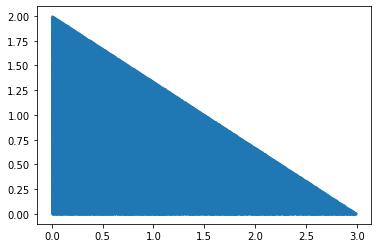

In [124]:
# Проверим, что это действительно равномерно распределено в треугольнике

import matplotlib.pyplot as plt
import itertools

# Fixing random state for reproducibility
np.random.seed(19680801)


def bsv():
    return np.random.uniform(0, 1)


def random_points():
    while True:
        x = xi1(bsv())
        y = xi2(x, bsv())
        yield (x, y)

N = 500000
points = np.fromiter(\
                     itertools.islice(random_points(), N), \
                     np.dtype('float,float'))

x = np.fromiter(map(lambda t: t[0], points), np.float)
y = np.fromiter(map(lambda t: t[1], points), np.float)
plt.scatter(x, y, s=1, alpha=0.5, )
plt.show()

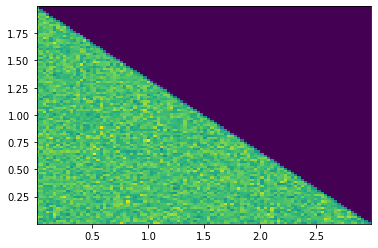

In [126]:
plt.hist2d(x, y, bins=100)
plt.show()

In [17]:
np.random.uniform(0, 3)

1.3912751393798888

# 3

Для интеграла 

$I = \int_{0}^{\pi/2}\cos{2x},d{x}$

Нужно указать СВ $\xi$ как ф-ю от БСВ, найти $D\{\xi\}$

---

$I = \int_{0}^{\pi/2}\cos{2x},d{x}
    = ...
    = \int_{0}^{1} \pi / 2 * \cos{\pi x}\,d{x}$
    
$\xi = \pi / 2 * \cos{\pi x}$

$D\{\xi\} = \int_{0}^{1} (\pi / 2 * \cos{\pi x})^2\,d{x} - 0 = \pi^2 / 8$

In [121]:
print('disp =', np.pi**2 / 8)

disp = 1.2337005501361697


0.0001084

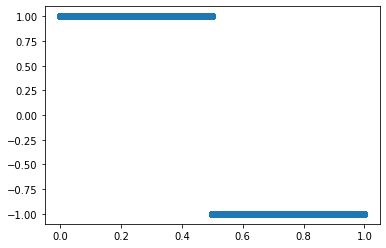

In [110]:
def xi(a):
    if 0 <= a < 0.5: 
        return 1
    elif a == 0.5:
        return 0 
    else: 
        return -1

a = np.random.uniform(size=10000000)
xis = np.fromiter(map(xi, a), float)
plt.scatter(a, xis)
plt.show
xis.mean()

# 4

Смоделировать значение СВ с $p_xi(x) = x * e^{- x^2/2}, x >= 0$ 

если БСВ $\alpha = 0.54$

## Решение

Воспользуемся методом обратной функции. 

1. Надём функцию распределения

$F(x) = \int_{0}^{x} t e^{- t^2/2}\,d t  
    = \int_{0}^{x^2 / 2} e^{- t^2/2}\,d{t^2/2}  
$

$F(x) = 1 - e^{- x^2/2}, x >= 0$

2. Обратная функция

$F^{-1}(y) = \sqrt{ - 2 * ln(1-y)}, y \in [0,1]$ 

In [119]:
alpha = 0.54

xi = np.sqrt( -2 * np.log(1 - alpha))

print('xi=', xi)

xi= 1.2462173080959809
